In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.19.0


In [1]:
from keras.models import Sequential
from keras.datasets import cifar10

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 270s 2us/step


In [5]:
print(x_train.shape , x_test.shape )
# Output: (50000, 32, 32, 3) (10000, 32, 32, 3)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [7]:
x_train.max()
# Output: 255

255

In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0  # Normalize

In [12]:
print( x_test[0][0][0],x_test.shape)

[0.61960784 0.43921569 0.19215686] (10000, 32, 32, 3)


In [13]:
import keras 
model =Sequential()

In [14]:
# Input layer - CIFAR images are 32x32x3 (RGB)
model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))

C:\Users\shubham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.add(keras.layers.Dense(128, activation='relu') )
# hidden layer

In [16]:
model.add(keras.layers.Dense(64, activation= 'relu') )

In [17]:
model.add(keras.layers.Dense(10, activation = 'softmax') )

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train model using SGD(None, 128) 

In [20]:
model.compile(optimizer = 'sgd' , loss ='sparse_categorical_crossentropy', metrics =["accuracy"]) 

In [21]:
H = model.fit(x_train, y_train , validation_data = ( x_test, y_test ), epochs= 10 )

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2622 - loss: 2.0190 - val_accuracy: 0.3459 - val_loss: 1.8049
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3789 - loss: 1.7514 - val_accuracy: 0.3747 - val_loss: 1.7818
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4085 - loss: 1.6628 - val_accuracy: 0.4227 - val_loss: 1.6135
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4361 - loss: 1.5966 - val_accuracy: 0.4008 - val_loss: 1.6460
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4425 - loss: 1.5612 - val_accuracy: 0.4171 - val_loss: 1.6467
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4596 - loss: 1.5270 - val_accuracy: 0.4552 - val_loss: 1.5187
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4759 - loss: 1.4842 - val_accuracy: 0.4346 - val_loss: 1.5636
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4747 - loss: 1.4733 - 

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test )
print("Loss = " , test_loss)
print("Accuracy = " , test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4739 - loss: 1.4673
Loss =  1.47036874294281
Accuracy =  0.47699999809265137


In [23]:
import matplotlib.pyplot as plt


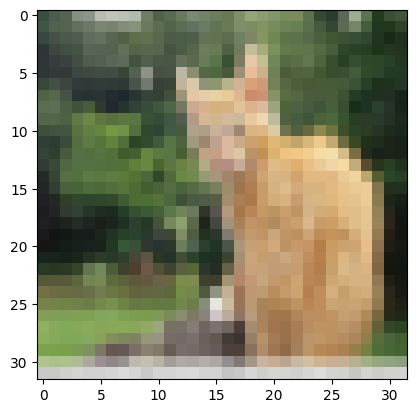

In [32]:
n = random.randint(0, 9999)
plt.imshow(x_test[n] )
plt.show()

In [30]:
prediction = model.predict(x_test)
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step


array([[1.5890542e-02, 1.9866994e-02, 9.2875704e-02, ..., 4.1060452e-03,
        4.2441163e-02, 2.8854168e-03],
       [2.8148934e-02, 3.2125363e-01, 9.6519483e-04, ..., 4.6374742e-04,
        3.0650315e-01, 3.3769298e-01],
       [3.0184045e-01, 9.9802680e-02, 5.3969636e-03, ..., 2.9364887e-03,
        4.9494657e-01, 8.3119512e-02],
       ...,
       [1.4733662e-03, 7.8212289e-04, 9.6506849e-02, ..., 2.7579010e-02,
        1.0604554e-02, 8.9061167e-03],
       [4.9835094e-03, 2.6604189e-03, 8.1959412e-02, ..., 2.3160640e-02,
        2.0729413e-03, 3.0189173e-03],
       [3.6285959e-02, 1.3589471e-03, 1.3662538e-01, ..., 4.8510262e-01,
        4.9680262e-03, 8.5270517e-03]], dtype=float32)

In [33]:
# CIFAR-10 class names for reference
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# print("CIFAR-10 Classes:", class_names)
class_names[np.argmax(prediction[n] ) ]

'deer'

CIFAR-10 Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [34]:
prediction[n]

array([0.00123567, 0.0007126 , 0.07552815, 0.1362892 , 0.29281157,
       0.27149343, 0.1704746 , 0.04443727, 0.00117643, 0.00584103],
      dtype=float32)

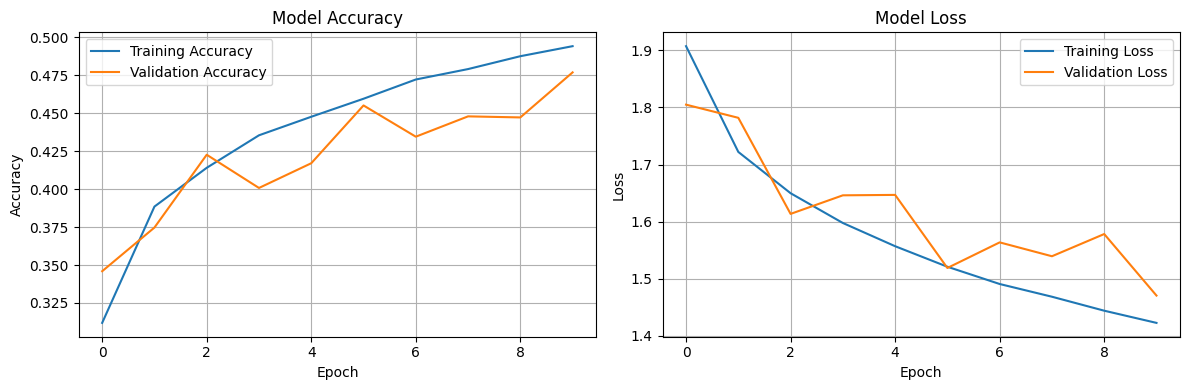

In [35]:
# Plot training history to show learning progress
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(H.history['loss'], label='Training Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()